In [46]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer, word_tokenize, wordpunct_tokenize, sent_tokenize

import random

from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

In [47]:
with open('shakespeare.txt', 'r') as f:
    data = f.read() #Reading in Sonnets

In [48]:
sonnets = data.split('\n\n')
#Splitting each sonnet up based on double gap between poems
sonnets = [sonnet.strip() for sonnet in sonnets] #Removing whitespace
sonnets.pop(98) #Removing Sonnets with not 14 lines
sonnets.pop(124)
lines = [sonnet.split('\n') for sonnet in sonnets] #splitting up the sonnets into lines
lines = [line[1:] for line in lines] #Removing index of poem
quattrains = [line[0:4] for line in lines] + [line[4:8] for line in lines] + [line[8:12] for line in lines] #splitting data
couplets = [line[12:15] for line in lines]                                  #into quattrains and couplets

In [49]:
tknzr = TweetTokenizer()
#tokenizing each quattrain and coup line by line, not excluding bigrams/splitting hyphenated words
token_quat = [ [tknzr.tokenize(line) for line in quattrain] for quattrain in quattrains] 
token_coup = [ [tknzr.tokenize(line) for line in couplet] for couplet in couplets]


punct = set(['.', ',', '!', ':', ';'])

#Removing punctiation from the tokens available
filtered_token_quat = [ [[word for word in line if word not in punct] for line in quattrain] for quattrain in token_quat]
#Putting 4 lines of each quattrain together into one element
concat_token_quat = [quattrain[0] + quattrain[1] + quattrain[2] + quattrain[3] for quattrain in filtered_token_quat]

filtered_token_coup = [ [[word for word in line if word not in punct] for line in couplet] for couplet in token_coup]
concat_token_coup = [couplet[0] + couplet[1] for couplet in filtered_token_coup]


In [50]:
print(concat_token_quat) #Each element is the set of words in a quattrain in a poem

[['From', 'fairest', 'creatures', 'we', 'desire', 'increase', 'That', 'thereby', "beauty's", 'rose', 'might', 'never', 'die', 'But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', 'His', 'tender', 'heir', 'might', 'bear', 'his', 'memory'], ['When', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow', 'And', 'dig', 'deep', 'trenches', 'in', 'thy', "beauty's", 'field', 'Thy', "youth's", 'proud', 'livery', 'so', 'gazed', 'on', 'now', 'Will', 'be', 'a', 'tattered', 'weed', 'of', 'small', 'worth', 'held'], ['Look', 'in', 'thy', 'glass', 'and', 'tell', 'the', 'face', 'thou', 'viewest', 'Now', 'is', 'the', 'time', 'that', 'face', 'should', 'form', 'another', 'Whose', 'fresh', 'repair', 'if', 'now', 'thou', 'not', 'renewest', 'Thou', 'dost', 'beguile', 'the', 'world', 'unbless', 'some', 'mother'], ['Unthrifty', 'loveliness', 'why', 'dost', 'thou', 'spend', 'Upon', 'thy', 'self', 'thy', "beauty's", 'legacy', '?', "Nature's", 'bequest', 'gives', 'nothing', 'but', 'doth', 'lend', 'And

In [51]:
print(concat_token_coup) #Each element is the set of words in a couplet in a poem

[['Pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be', 'To', 'eat', 'the', "world's", 'due', 'by', 'the', 'grave', 'and', 'thee'], ['This', 'were', 'to', 'be', 'new', 'made', 'when', 'thou', 'art', 'old', 'And', 'see', 'thy', 'blood', 'warm', 'when', 'thou', "feel'st", 'it', 'cold'], ['But', 'if', 'thou', 'live', 'remembered', 'not', 'to', 'be', 'Die', 'single', 'and', 'thine', 'image', 'dies', 'with', 'thee'], ['Thy', 'unused', 'beauty', 'must', 'be', 'tombed', 'with', 'thee', 'Which', 'used', 'lives', 'th', "'", 'executor', 'to', 'be'], ['But', 'flowers', 'distilled', 'though', 'they', 'with', 'winter', 'meet', 'Leese', 'but', 'their', 'show', 'their', 'substance', 'still', 'lives', 'sweet'], ['Be', 'not', 'self-willed', 'for', 'thou', 'art', 'much', 'too', 'fair', 'To', 'be', "death's", 'conquest', 'and', 'make', 'worms', 'thine', 'heir'], ['So', 'thou', 'thy', 'self', 'out-going', 'in', 'thy', 'noon', 'Unlooked', 'on', 'diest', 'unless', 'thou', 'get', 'a', 'son'], ['Whos

In [52]:
quat_obs, quat_obs_map = parse_observations(concat_token_quat) #Making the observation maps for quattrains
coup_obs, coup_obs_map = parse_observations(concat_token_coup)  #Making the observation maps for couplets

In [53]:
quat_hmm8 = unsupervised_HMM(quat_obs, 10, 100) #Making the hmms for quattrains
coup_hmm8 = unsupervised_HMM(coup_obs, 10, 100)#Making the hmms for  couplets

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


Quattrain Sparsity Matrices:


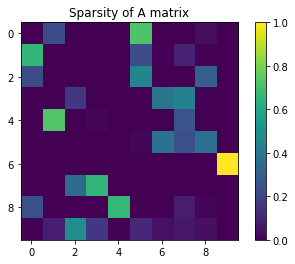

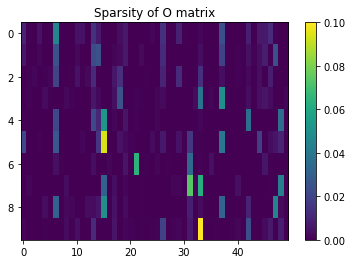

Couplet Sparsity Matrices:


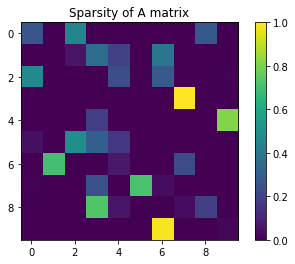

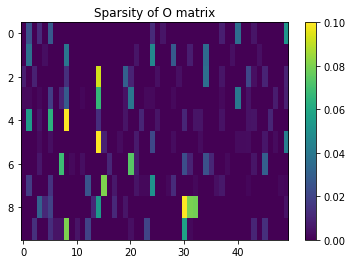

In [54]:
print('Quattrain Sparsity Matrices:\n====================')
visualize_sparsities(quat_hmm8, O_max_cols=50)
print('Couplet Sparsity Matrices:\n====================')
visualize_sparsities(coup_hmm8, O_max_cols=50)

In [55]:
print('Sample Sentence:\n====================') #Printing sample sentences from each hmm
print(sample_sentence(quat_hmm8, quat_obs_map, n_words=25))
print('Sample Sentence:\n====================')
print(sample_sentence(coup_hmm8, coup_obs_map, n_words=25))

Sample Sentence:
Mens part gain sweetness his away who flourish to love winters i that his compeers self beauteous confess  it in thy for you the...
Sample Sentence:
O whole and or nor  thee raised keeps i me my end man and loves my out fair your alone cunning sin preventst pity...


In [56]:
line_lengths = []
for i in range(0,14): #Here we randomize the length of each line to be 5-10 words long
    n = random.randint(5,8)
    p = random.random()
    if p < 1/3:
        n += 1
    elif p > 2/3:
        n += 2
    line_lengths.append(n)
print(line_lengths)

print('Sample Sonnet:\n====================') #Our sonnet consists of 12 lines from the quattrain hmm
for length in line_lengths:                   #And 2 lines from the couplet hmm
    print(sample_sentence(quat_hmm8, quat_obs_map, n_words=length))
print("   " + sample_sentence(coup_hmm8, coup_obs_map, n_words=line_lengths[12]))
print("   " + sample_sentence(coup_hmm8, coup_obs_map, n_words=line_lengths[13]))

[7, 8, 7, 6, 7, 8, 8, 8, 9, 7, 5, 7, 6, 5]
Sample Sonnet:
Sweet of loves graves therefore be in...
Gracious tickled to the deceive done dost revenge...
Today is but slide although the issue...
Of  and of he of...
And the despising depart yet both win...
A to closure of catch part deeds control...
A and kind you reviewest wandring widow deaths...
It adverse being who i whereto the that...
My and odour and dote the the nor have...
My niggarding verse oer their masonry now...
My in look savour care...
The esteemed with the in bright thee...
On allow as i but as...
Crow not that overthrow so...
   Being looks welcome must of my...
   Maketh with well if his...
